#  1. 产生tick日志

#####  编译最小main : 文件 mini_main.c
```cpp
//文件 mini_main.c
int main(int argc, char** argv){
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main.c
#生成tick日志文件:
#-rw-rw-r-- 32M  7月 30 22:17 clang-15_298040_1690726675727_1
```

#####  编译最小main+含错误的f1: 文件 mini_main_f1_err.c
```cpp
//文件 mini_main_f1_err.c
char* calc_name(float age, bool high, char* nick){
  if(high && age>5){
    return "child";
  }
  char name[32]={"bigPeople"};
  return name;
}
int main(int argc, char** argv){
	calc_name(10,false,"nick");
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main_f1_err.c
#生成tick日志文件:
#-rw-rw-r-- 27M  7月 30 23:02 clang-15_303915_1690729326061_1
```

#####  编译最小main+正确的f1: 文件 mini_main_f1_ok.c
```cpp
//文件 mini_main_f1_ok.c
char* calc_name(float age, short high, char* nick){
  if(high && age>5){
    return "child";
  }
  char name[32]={"bigPeople"};
  return name;
}
int main(int argc, char** argv){
	calc_name(10,0,"nick");
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main_f1_ok.c
#生成tick日志文件:
#-rw-rw-r-- 37M  7月 30 23:20 clang-15_306264_1690730435172_1
```

# 2. 加载tick日志

In [1]:
import numpy 
import math

In [2]:
import seaborn

In [3]:
import plotly.offline as plotly_offline
plotly_offline.init_notebook_mode(connected=True)          
import plotly.graph_objs as graph_objs                
import plotly.figure_factory as figure_factory 

from plotly.graph_objs import Scatter, Figure, Scatter3d



In [4]:
import pandas
# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

In [5]:
%%bash
ls -lhrt /tick_data_home/

总计 368M
-rw-rw-r-- 1 zz zz  20M  7月 27 16:42 clang-15_252255_1690447364166_1
-rw-rw-r-- 1 zz zz  17M  7月 27 17:54 clang-15_268265_1690451684154_1
-rw-rw-r-- 1 zz zz  23M  7月 27 18:35 clang-15_272726_1690454100567_1
-rw-rw-r-- 1 zz zz  19M  7月 27 19:08 clang-15_279683_1690456088122_1
-rw-rw-r-- 1 zz zz 5.0M  7月 27 19:08 clang-15_279682_1690456088057_1
-rw-rw-r-- 1 zz zz  22M  7月 27 19:08 clang-15_279758_1690456131168_1
-rw-rw-r-- 1 zz zz 5.0M  7月 27 19:08 clang-15_279757_1690456131110_1
-rw-rw-r-- 1 zz zz  66M  7月 27 19:40 clang-15_284358_1690458014273_1
-rw-rw-r-- 1 zz zz  20M  7月 29 23:18 clang-15_320593_1690643890944_1
-rw-rw-r-- 1 zz zz  18M  7月 29 23:45 clang-15_406251_1690645502530_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:15 clang-15_297928_1690726545091_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:17 clang-15_297999_1690726628322_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:17 clang-15_298040_1690726675727_1
-rw-rw-r-- 1 zz zz  27M  7月 30 23:02 clang-15_303915_1690729326061_1
-rw-rw-r-- 1 zz zz  37M  7

In [6]:
#编译正常: mini_main.c
df_mini_main=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_298040_1690726675727_1",sep=',')

#编译错误: mini_main_f1_err.c
df_mini_main_f1_err=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_303915_1690729326061_1",sep=',')

# #编译正常: mini_main_f1_ok.c
df_mini_main_f1_ok=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_306264_1690730435172_1",sep=',')


In [7]:
df_mini_main.tail()

滴答  d栈生  d栈死  d堆生  d堆死      栈生      栈死     栈净  堆生  堆死  堆净
845796  740380    1    0    0    0  239861  218336  21525   0   0   0
845797  740381    0    0    0    0  239861  218336  21525   0   0   0
845798  740381    0    1    0    0  239861  218337  21524   0   0   0
845799  740381    0    0    0    0  239861  218337  21524   0   0   0
845800  740132    0    0    0    0  239860  218336  21524   0   0   0

In [8]:
df_mini_main_f1_err.tail()

滴答  d栈生  d栈死  d堆生  d堆死      栈生      栈死     栈净  堆生  堆死  堆净
720517  621641    1    0    0    0  228609  192529  36080   0   0   0
720518  621642    0    0    0    0  228609  192529  36080   0   0   0
720519  621642    0    1    0    0  228609  192530  36079   0   0   0
720520  621642    0    0    0    0  228609  192530  36079   0   0   0
720521  621393    0    0    0    0  228608  192529  36079   0   0   0

In [9]:
df_mini_main_f1_ok.tail()

滴答  d栈生  d栈死  d堆生  d堆死      栈生      栈死     栈净  堆生  堆死  堆净
979366  849788    1    0    0    0  272366  246714  25652   0   0   0
979367  849789    0    0    0    0  272366  246714  25652   0   0   0
979368  849789    0    1    0    0  272366  246715  25651   0   0   0
979369  849789    0    0    0    0  272366  246715  25651   0   0   0
979370  849540    0    0    0    0  272365  246714  25651   0   0   0

In [10]:
#df备份:
# df_mini_main_=df_mini_main
# df_mini_main_f1_err_=df_mini_main_f1_err
# df_mini_main_f1_ok_=df_mini_main_f1_ok


In [11]:

#tick日志特别的密集，这里间隔200个tick采样一次，方便输出观看，否则容易浏览器卡死 图出不来。
df_mini_main=df_mini_main[::200]  #pandas.Dataframe间隔200行采样1行
df_mini_main_f1_err=df_mini_main_f1_err[::200]  
df_mini_main_f1_ok=df_mini_main_f1_ok[::200]  

# df5Full=df5
# #df5轨迹太长了，先只看一部分
# df5=df5[:len(df3)]

# 3.  单日志作图 (seaborn)
>  seaborn作图会留在 .ipynb文件内，网页上浏览代码仓库中 此 .ipynb文件 即可看到 seaborn图，方便。

In [12]:

import warnings
# 过滤掉RuntimeWarning警告
warnings.filterwarnings("ignore", category=RuntimeWarning)


##  1. mini_main.c作图

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

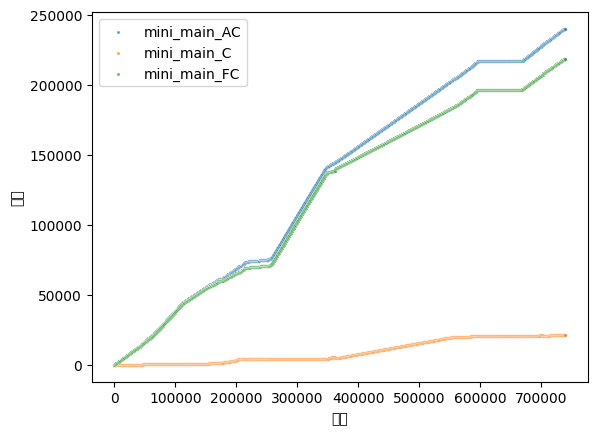

In [13]:

#alpha=0.9,size=1, 
seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_AC')  
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_C')   
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_FC')   


<AxesSubplot:xlabel='滴答', ylabel='栈净'>

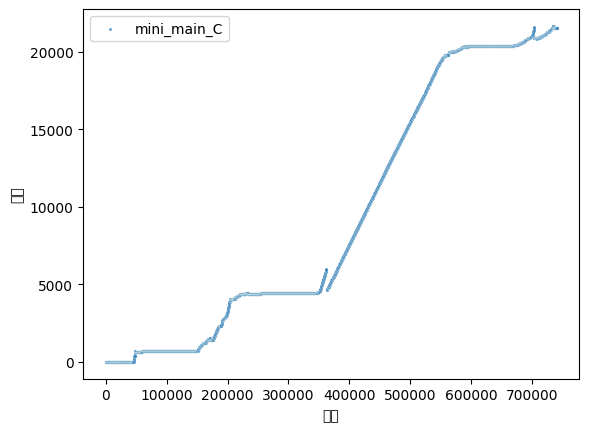

In [14]:
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_C')  

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

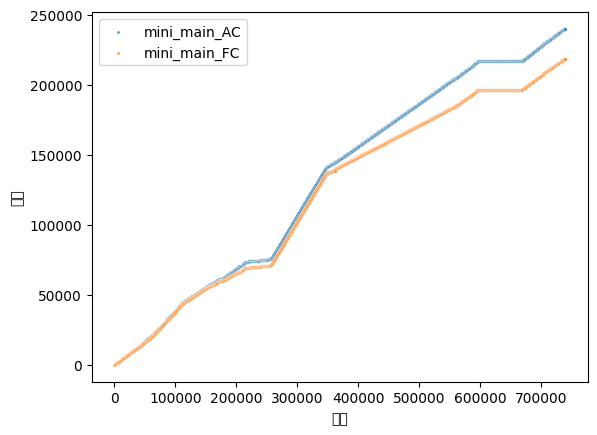

In [15]:

seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_AC')  
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_FC')  

##  2. mini_main_f1_err.c作图

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

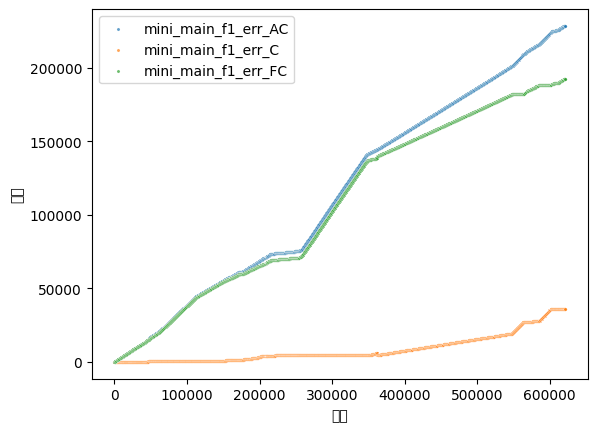

In [16]:

seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_AC')  
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_C')   
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_FC')   


<AxesSubplot:xlabel='滴答', ylabel='栈净'>

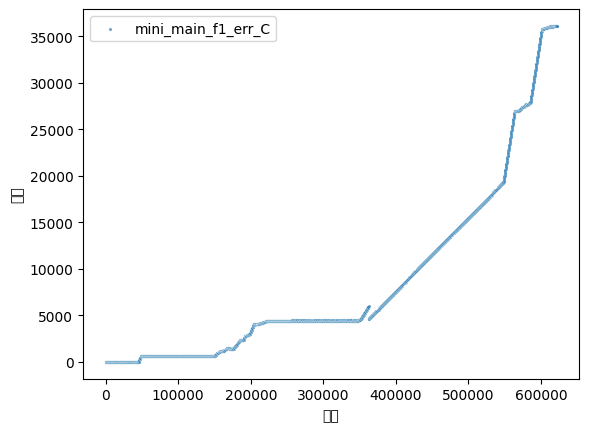

In [17]:

seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_C')   


<AxesSubplot:xlabel='滴答', ylabel='栈生'>

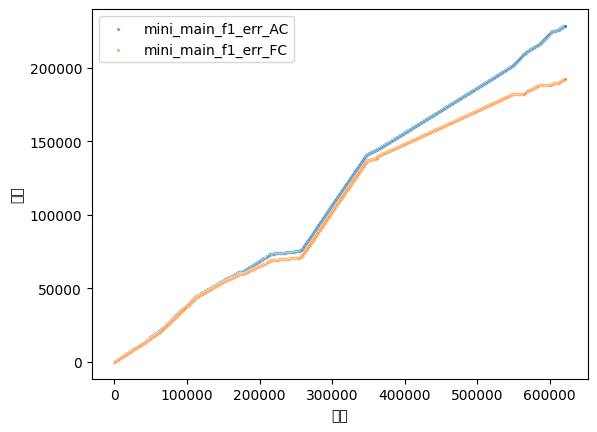

In [18]:

seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_AC')  
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_FC')   


##  3. mini_main_f1_ok.c作图

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

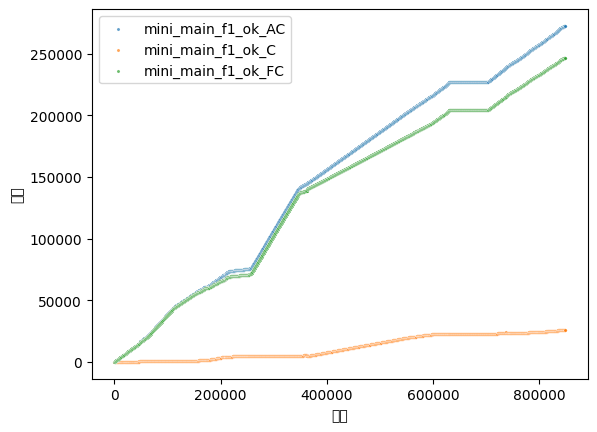

In [19]:

seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_AC')  
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_C')   
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_FC')   


<AxesSubplot:xlabel='滴答', ylabel='栈净'>

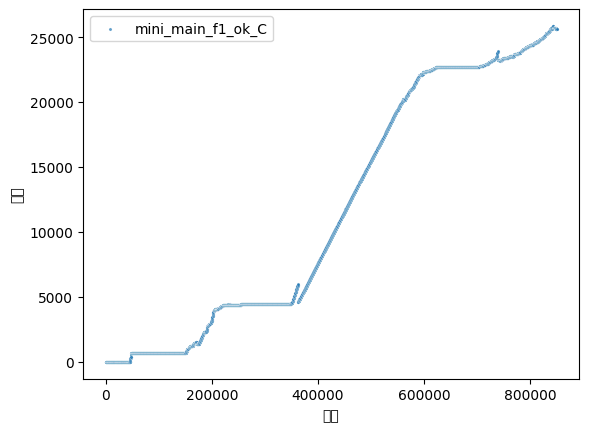

In [20]:
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_C')   

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

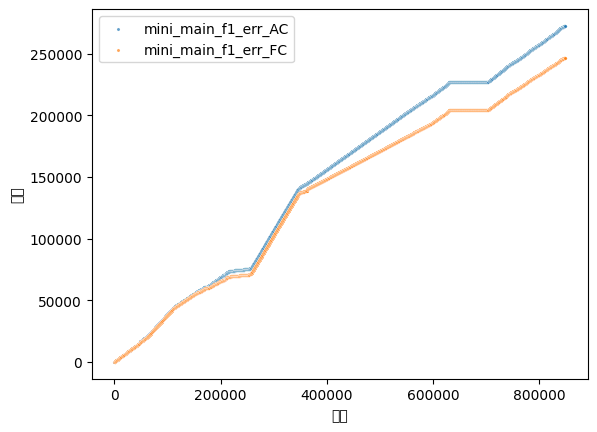

In [21]:
seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_err_AC')  
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_err_FC')   

# 4.  日志比对作图 (seaborn)

##  1.    对比  栈净  作图

<AxesSubplot:xlabel='滴答', ylabel='栈净'>

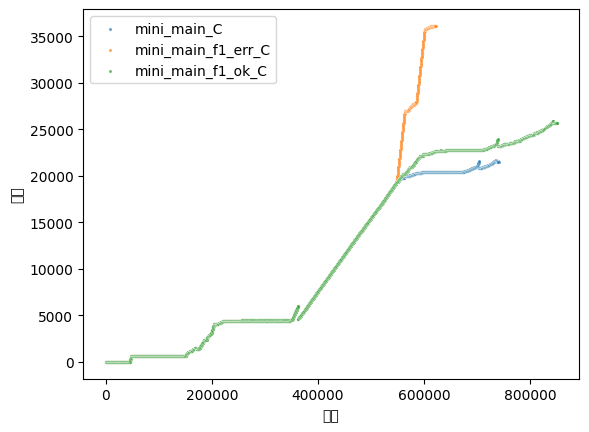

In [22]:
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_C')  
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_C') 
seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_C')   

In [23]:
##  2.    对比  栈生  作图

<AxesSubplot:xlabel='滴答', ylabel='栈生'>

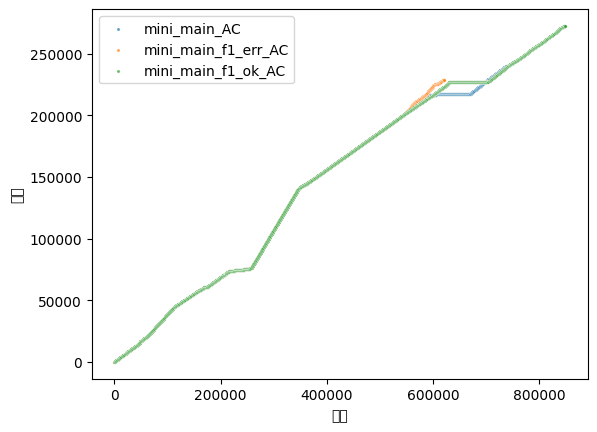

In [24]:
seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_AC')  
seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_AC') 
seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_AC')   

In [25]:
##  3.    对比  栈死  作图

<AxesSubplot:xlabel='滴答', ylabel='栈死'>

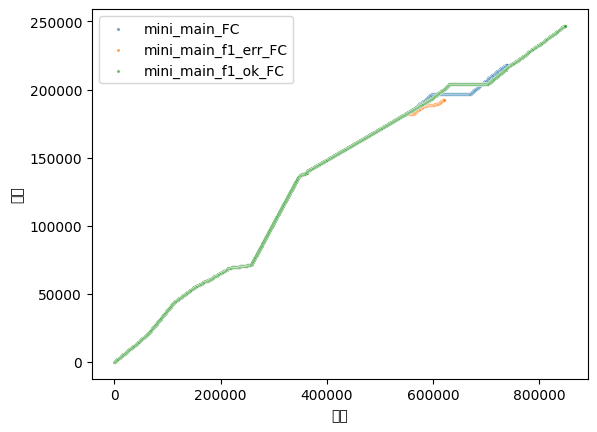

In [26]:
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.7, s=5, label='mini_main_FC')  
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.7, s=5, label='mini_main_f1_err_FC') 
seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.7, s=5, label='mini_main_f1_ok_FC')   

# 5.  单日志作图 (plotly)


> plotly作图 , 结果当然是和 seaborn一样了

> plotly作图 不会留在 .ipynb文件内，但比seaborn清晰。

##  1. mini_main.c作图


In [27]:

mini_main_栈生_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈生"
)


mini_main_栈净_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈净"
)

mini_main_栈死_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈死,"
)





In [28]:
#浏览器中显示:
plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈净_trace, mini_main_栈死_trace])
plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈死_trace])
plotly_offline.iplot([ mini_main_栈净_trace])

##  2. mini_main_f1_err.c作图

In [29]:

mini_main_f1_err_栈生_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈生"
)


mini_main_f1_err_栈净_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈净"
)

mini_main_f1_err_栈死_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈死,"
)




In [30]:
#浏览器中显示:
plotly_offline.iplot([ mini_main_f1_err_栈生_trace, mini_main_f1_err_栈净_trace, mini_main_f1_err_栈死_trace])
plotly_offline.iplot([ mini_main_f1_err_栈生_trace, mini_main_f1_err_栈死_trace])
plotly_offline.iplot([ mini_main_f1_err_栈净_trace])


##  3. mini_main_f1_ok.c作图

In [31]:

mini_main_f1_ok_栈生_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈生"
)


mini_main_f1_ok_栈净_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈净"
)

mini_main_f1_ok_栈死_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈死,"
)






In [32]:
#浏览器中显示:
plotly_offline.iplot([ mini_main_f1_ok_栈生_trace, mini_main_f1_ok_栈净_trace, mini_main_f1_ok_栈死_trace])
plotly_offline.iplot([ mini_main_f1_ok_栈生_trace, mini_main_f1_ok_栈死_trace])
plotly_offline.iplot([ mini_main_f1_ok_栈净_trace])

# 4.  日志比对作图 (seaborn)

##  1.    对比  栈净  作图

In [33]:
#浏览器:
plotly_offline.iplot([ mini_main_栈净_trace, mini_main_f1_err_栈净_trace, mini_main_f1_ok_栈净_trace])


##  2.    对比  栈生  作图

In [34]:
#浏览器:
plotly_offline.iplot([ mini_main_栈生_trace, mini_main_f1_err_栈生_trace, mini_main_f1_ok_栈生_trace])


##  3.    对比  栈死  作图

In [35]:
#浏览器:
plotly_offline.iplot([ mini_main_栈死_trace, mini_main_f1_err_栈死_trace, mini_main_f1_ok_栈死_trace])
